We start by getting a picture. Since parts of this lecture are based on Pyimagesearch's basic image manipulation tutorial, see http://www.pyimagesearch.com/2014/01/20/basic-image-manipulations-in-python-and-opencv-resizing-scaling-rotating-and-cropping/, we make use of the same image:

![](http://www.pyimagesearch.com/wp-content/uploads/2014/01/jurassic-park-tour-jeep.jpg)

Later in the tutorial, we will use another image:

![](http://1.bp.blogspot.com/-lzNnsDrxp-A/U7UEUDx9-aI/AAAAAAABDEM/_lWD43uxKOI/s1600/mare-08.jpg)

In [13]:
%%bash

wget http://www.pyimagesearch.com/wp-content/uploads/2014/01/jurassic-park-tour-jeep.jpg
wget http://1.bp.blogspot.com/-lzNnsDrxp-A/U7UEUDx9-aI/AAAAAAABDEM/_lWD43uxKOI/s1600/mare-08.jpg

--2017-04-01 07:15:41--  http://www.pyimagesearch.com/wp-content/uploads/2014/01/jurassic-park-tour-jeep.jpg
Resolving www.pyimagesearch.com (www.pyimagesearch.com)... 50.116.58.97
Connecting to www.pyimagesearch.com (www.pyimagesearch.com)|50.116.58.97|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69348 (68K) [image/jpeg]
Saving to: ‘jurassic-park-tour-jeep.jpg.2’

     0K .......... .......... .......... .......... .......... 73%  283K 0s
    50K .......... .......                                    100% 8.12M=0.2s

2017-04-01 07:15:42 (379 KB/s) - ‘jurassic-park-tour-jeep.jpg.2’ saved [69348/69348]

--2017-04-01 07:15:42--  http://1.bp.blogspot.com/-lzNnsDrxp-A/U7UEUDx9-aI/AAAAAAABDEM/_lWD43uxKOI/s1600/mare-08.jpg
Resolving 1.bp.blogspot.com (1.bp.blogspot.com)... 172.217.18.33, 2a00:1450:4005:809::2001
Connecting to 1.bp.blogspot.com (1.bp.blogspot.com)|172.217.18.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83145 (81K) [ima

In [14]:
%matplotlib inline

# Intro to OpenCV 

*OpenCV* (Open Source Computer Vision Library) is an open source computer vision and machine learning software library with more than 2500 optimized algorithms. The library is written in optimized C/C++ and has interfaces for various languages.


## Reading an Image from Disk
You can read an image as in the following. Note, that the swap of color channels (`cv2.COLOR_BGR2RGB`) is only necessary for inlining a picture with `matplotlib`.

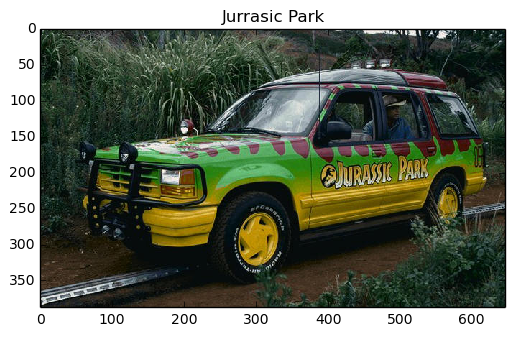

In [16]:
# https://github.com/mciantyre/scipy-opencv-notebook
import cv2
import matplotlib.pyplot as plt


image = cv2.imread('./jurassic-park-tour-jeep.jpg')
# the swap of color channels is only necessary for inlining a picture with matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image, interpolation='none')
plt.title('Jurrasic Park')

In case you do not want to plot a picture inlined but open an external image viewer, you can use the `cv2.imshow("Image Name", img)` in stand-alone programs, i.e., not in Jupyter Notebooks.


## Resizing an Image

You can use various interpolation mechanisms when resizing. OpenCV is really well documented and you can find more on `cv2.resize`'s interpolation options here: http://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=resize#resize

<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

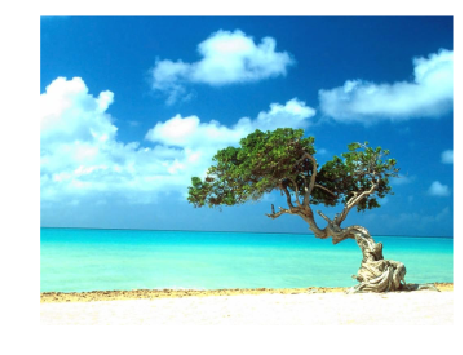

In [17]:
def read(path, switch_channels=True):
    image = cv2.imread(path)
    if switch_channels:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


def resize(image, new_x_dim):
    ratio = new_x_dim / image.shape[1]
    dim = (new_x_dim, int(image.shape[0] * ratio))
    
    # perform the actual resizing of the image and show it
    resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized_image


def create_plot(image, title=''):
    plt.imshow(image, interpolation='none')
    plt.title(title)
    plt.axis('off')
    return plt


# image_path = './jurassic-park-tour-jeep.jpg'
image_path = './mare-08.jpg'

img = read(image_path)
img_small = resize(img, 320)
create_plot(img_small)

# Detecting Objects in an Image

In [18]:
%%bash

wget http://www.atpworldtour.com/-/media/images/verdasco-dubai-2017-thursday.jpg

--2017-04-01 07:36:47--  http://www.atpworldtour.com/-/media/images/verdasco-dubai-2017-thursday.jpg
Resolving www.atpworldtour.com (www.atpworldtour.com)... 69.16.175.42, 69.16.175.10
Connecting to www.atpworldtour.com (www.atpworldtour.com)|69.16.175.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73633 (72K) [image/jpeg]
Saving to: ‘verdasco-dubai-2017-thursday.jpg.1’

     0K .......... .......... .......... .......... .......... 69% 20.8M 0s
    50K .......... .......... .                               100% 1.99M=0.01s

2017-04-01 07:36:47 (5.37 MB/s) - ‘verdasco-dubai-2017-thursday.jpg.1’ saved [73633/73633]



<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

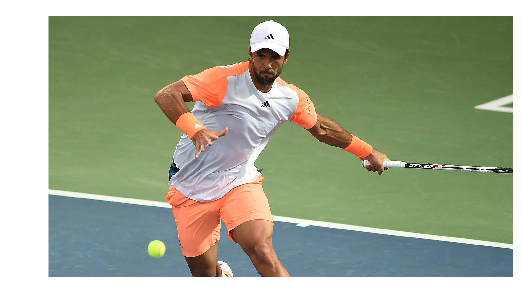

In [20]:
image_path = './verdasco-dubai-2017-thursday.jpg'

img = read(image_path)

create_plot(img)

## Color Spaces

We have seen the RGB color space so far, where three channels contain the information about how much red, green, and blue contribute to the color of a pixel.

A disadvantage with the RGB color space is, that pixel values change quite much for the same color under different light conditions.

Alternatives to the RGB color space are for example the HSV (Hue, Saturation, Value) color space and the Lab color space, where *L* stands for lightness and *a* and *b* for the color opponents green–red and blue–yellow.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/HSV_color_solid_cone_chroma_gray.png/640px-HSV_color_solid_cone_chroma_gray.png)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/06/CIELAB_color_space_top_view.png/497px-CIELAB_color_space_top_view.png)


Using the HSV color space, we can find for example the tennis ball quite easily. We create a mask for a certain range of color values, which are characterisitc for a tennis ball.

<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

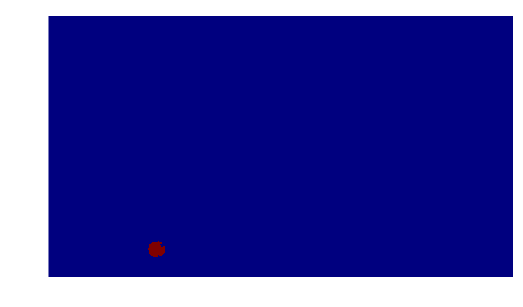

In [26]:
def create_ball_mask(image):

    green_lower = (20, 100, 180)
    green_upper = (60, 255, 255)

    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
 
    mask = cv2.inRange(hsv, green_lower, green_upper)
    mask = cv2.erode(mask, None, iterations=2)
    mask = cv2.dilate(mask, None, iterations=2)
    
    return mask


create_plot(create_ball_mask(img))

In [27]:
def mark_object(image, mask):

    contours = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

    # find the largest contour in the mask, then use
    # it to compute the minimum enclosing circle and
    # centroid
    c = max(contours, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)

    # draw the circle and centroid on the frame,
    # then update the list of tracked points
    cv2.circle(image, (int(x), int(y)), int(radius), (255, 0, 0), 5)
    return image


img = mark_object(img, mask)
cv2.imwrite('./verdasco-obj-detected.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

True

![](./verdasco-obj-detected.jpg)

In [28]:
%%bash

wget http://media.npr.org/assets/img/2016/12/20/ap_16281584372854-061869e770af197e85badc7147ade2f8a0ac582c-s900-c85.jpg

--2017-04-01 08:01:58--  http://media.npr.org/assets/img/2016/12/20/ap_16281584372854-061869e770af197e85badc7147ade2f8a0ac582c-s900-c85.jpg
Resolving media.npr.org (media.npr.org)... 104.120.240.223
Connecting to media.npr.org (media.npr.org)|104.120.240.223|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82220 (80K) [image/JPEG]
Saving to: ‘ap_16281584372854-061869e770af197e85badc7147ade2f8a0ac582c-s900-c85.jpg.1’

     0K .......... .......... .......... .......... .......... 62% 12.3M 0s
    50K .......... .......... ..........                      100% 8.82M=0.007s

2017-04-01 08:01:58 (10.7 MB/s) - ‘ap_16281584372854-061869e770af197e85badc7147ade2f8a0ac582c-s900-c85.jpg.1’ saved [82220/82220]



<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

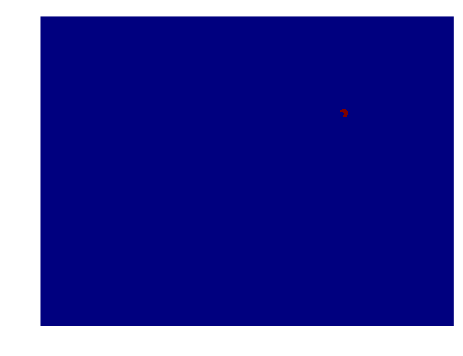

In [29]:
image_path = 'ap_16281584372854-061869e770af197e85badc7147ade2f8a0ac582c-s900-c85.jpg'

img = read(image_path)
mask = create_ball_mask(img)
img = mark_object(img, mask)

cv2.imwrite('./obj-detected.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
create_plot(create_ball_mask(img))

![](./obj-detected.jpg)

True False


<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

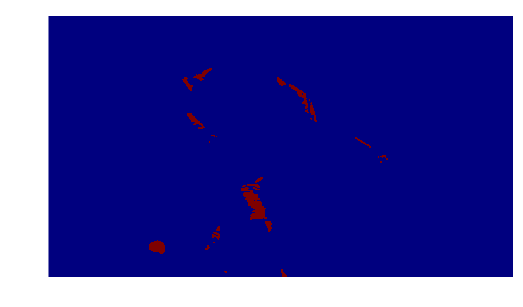

In [22]:
image_path = './verdasco-dubai-2017-thursday.jpg'

img = read(image_path)

green_lower = (200, 180, 70)
green_upper = (255, 255, 175)
 
# construct a mask for the color "green", then perform
# a series of dilations and erosions to remove any small
# blobs left in the mask
mask = cv2.inRange(img, green_lower, green_upper)
mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2)
print(mask.any(), mask.all())
create_plot(mask)

## Reducing the Amount of Colors in an Image



The following code is taken from the example on http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py

The process of reducing the number of distinct colors in an image is often called color quantization. The idea is to preserve the color appearance of an image and to reduce the number of colors, e.g. for compression.

You can make use of the Mean Shift algorithm from two lectures ago to perform color quantization. This will find you all of the 'most prominent' colors. However, the drawback is that the Mean Shift algorithm has exponential runtime, which makes it unsuitable for color quantization in bigger images.

There is a nice tutorial on http://www.pyimagesearch.com/2014/07/07/color-quantization-opencv-using-k-means-clustering/

Fitting model on a small sub-sample of the data
done in 0.100s.
Predicting color indices on the full image (k-means)
done in 0.145s.
(768, 1024, 3)


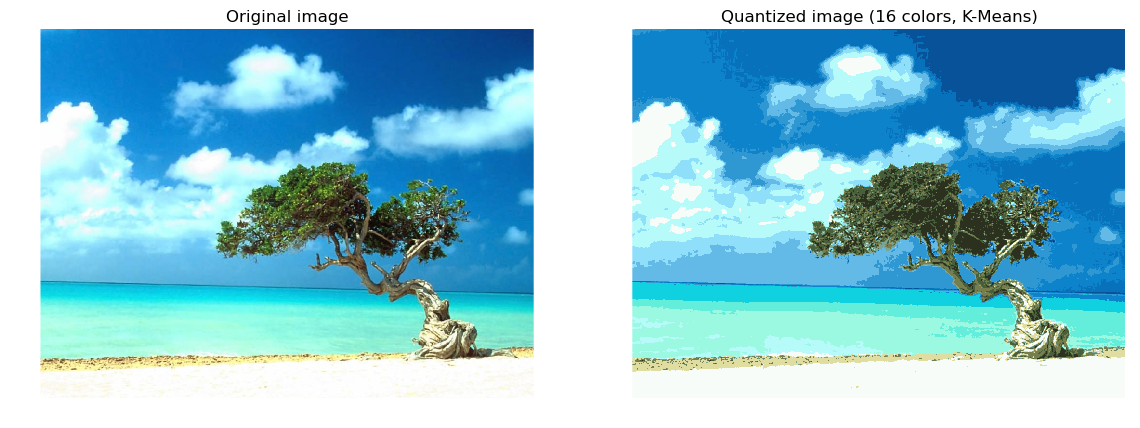

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time


def apply_kmeans(image, n_colors=16):
    # Convert to floats instead of the default 8 bits integer coding. Dividing by
    # 255 is important so that plt.imshow behaves works well on float data (need to
    # be in the range [0-1])
    image = np.array(image, dtype=np.float64) / 255

    # Load Image and transform to a 2D numpy array.
    w, h, d = image.shape
    assert d == 3
    image_array = np.reshape(image, (w * h, d))

    print("Fitting model on a small sub-sample of the data")
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    print("done in %0.3fs." % (time() - t0))

    # Get labels for all points
    print("Predicting color indices on the full image (k-means)")
    t0 = time()
    labels = kmeans.predict(image_array)
    print("done in %0.3fs." % (time() - t0))
    
    return labels, kmeans.cluster_centers_, w, h


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image


n_colors = 16

image_path = 'mare-08.jpg'
image = read(image_path)  # load_sample_image("china.jpg")
labels, cluster_centers, w, h = apply_kmeans(image, n_colors=n_colors)
quant_image = recreate_image(cluster_centers, labels, w, h)

print(image.shape)



plt.figure(figsize=(14, 7))
plt.clf()
plt.axis('off')

plt.subplot(1, 2, 1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, interpolation='none')

plt.subplot(1, 2, 0)
plt.title('Quantized image ({} colors, K-Means)'.format(n_colors))
plt.axis('off')
plt.imshow(quant_image, interpolation='none')
plt.show()

In [ ]:
256**3


# Color Quantization and Color Replacement

Let's do a bit of art. Say we have a modern photo and we want to make it appear as back in the days on a Commodore 64.
Similar to this: http://realstuffforabstractpeople.com/retrofyme/


![](http://www.nightfallcrew.com/wp-content/gallery/industrial_dawn_demo/industrial_dawn_demo_0.png)

Consequently, since the C64 can only display 16 colors, we could write a small program, which applies color quantization as above and subsequently, we find the nearest color in the C64 color palette, see https://en.wikipedia.org/wiki/List_of_color_palettes.


100%|██████████| 320/320 [00:12<00:00, 24.89it/s]


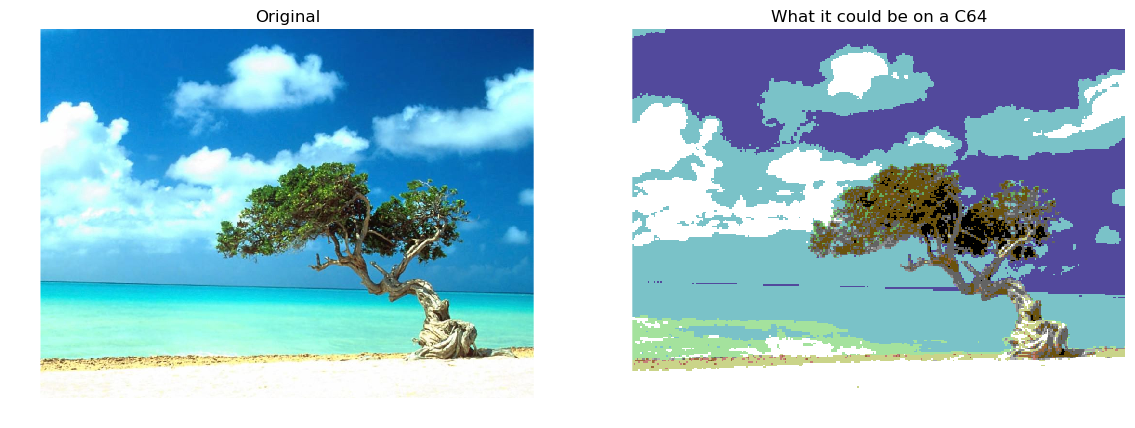

In [47]:
from tqdm import tqdm
from scipy.spatial import distance


def _c64_colors():
    # From https://upload.wikimedia.org/wikipedia/commons/6/65/Commodore64_palette.png
    # with Seashore, The 16 C64 colors
    black = [0, 0, 0]
    white = [255, 255, 255]
    red = [154, 76, 67]
    cyan = [122, 194, 200]
    purple = [157, 90, 165]
    green = [103, 171, 95]
    blue = [82, 73, 156]
    yellow = [202, 212, 137]
    a = [156, 103, 58]
    b = [106, 82, 12]
    c = [197, 126, 119]
    d = [99, 99, 99]
    e = [139, 139, 139]
    f = [164, 226, 157]
    g = [139, 130, 205]
    hc = [175, 175, 175]

    c64_colors = [black, white, red, cyan, purple, green, blue, yellow, 
                  a, b, c, d, e, f, g, hc]
    return c64_colors


def _get_closest_c64_color(value):
    dst = 200000
    for color in _c64_colors():
        new_dst = distance.euclidean(color, value)
        if new_dst < dst:
            dst = new_dst
            return_color = color
    return return_color


def to_c64_colors(image):
    """
    image:
        A 3d numpy array
    """
    c64_img = np.copy(image)
    h, w, _ = c64_img.shape
    
    for x in tqdm(range(w)):
        for y in range(h):
            c64_img[y, x] = _get_closest_c64_color(c64_img[y, x])
    
    return c64_img


small_image = resize(image, 320)
c64_image = to_c64_colors(small_image)

plt.figure(figsize=(14, 7))
plt.clf()
plt.axis('off')

plt.subplot(1, 2, 1)
plt.title('Original'.format(n_colors))
plt.axis('off')
plt.imshow(image, interpolation='none')

plt.subplot(1, 2, 0)
plt.title('What it could be on a C64'.format(n_colors))
plt.axis('off')
plt.imshow(c64_image, interpolation='none')
plt.show()

##  Finding Nearest-neighbours with KD-Trees

As you can see, the naive implementation above is quite slow. We could speed it up, by first apply a color 

However, we can also make use of a KD-Tree containing the 

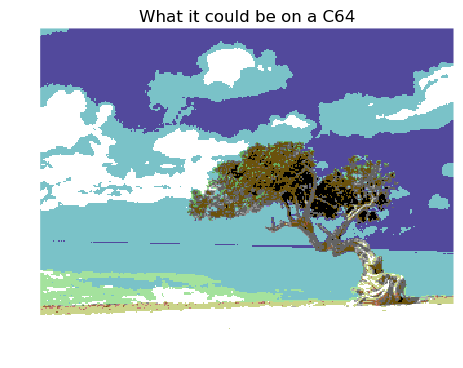

In [53]:
import scipy.spatial as sp



def create_tree(colors):
    tree = sp.cKDTree(colors)  # creating kd-tree from C64 colors
    return tree


def query_tree(small_image, tree):
    h, w, d = small_image.shape
    small_image_lst = small_image.reshape(h * w, d)
    distance, result = tree.query(small_image_lst)  # get Euclidean distance and index of each C64 color in tree

    for idx, c in enumerate(_c64_colors()):
        small_image_lst[result == idx] = c
    return small_image_lst

tree = create_tree(_c64_colors())
small_image_lst = query_tree(small_image, tree)      

plt.title('What it could be on a C64'.format(n_colors))
plt.axis('off')
plt.imshow(small_image_lst.reshape(h, w, d), interpolation='none')
plt.show()

In [55]:
%%timeit 
small_image_lst = query_tree(small_image, tree)      

10 loops, best of 3: 33.7 ms per loop


In [42]:
import math


math.sqrt(255 ** 2 + 245 ** 2 + 10 ** 2)

353.7654590261746